# Import library and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, confusion_matrix, classification_report
import warnings    
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

import lime
import lime.lime_tabular

from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

from imblearn.under_sampling import RandomUnderSampler
#smote - Tạo thêm dữ liệu để cân bằng 

# Yêu cầu : Dự đoán khả năng thu hồi nợ của khách hàng (Fully Paid/ Charged off) dựa vào các đặc trưng trong dataset

# I. Dataset Discovery

In [2]:
df = pd.read_csv('C:\\Users\\namqt\\05.Project\\credit_train.csv')

In [3]:
df[df['Current Loan Amount'] > 80000000]['Loan Status'].unique()

array(['Fully Paid'], dtype=object)

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [6]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


### Một vài nhận xét về dataset
- Có giá trị na trong dataset
- Không có giá trị âm trong dataset

# II. Data understanding & Data preparation

## 2.1. Deal with na values

In [7]:
#First, we neet to delete few columns that do not make sense in the analysis
df.drop(columns = ['Loan ID', 'Customer ID'], inplace = True)

In [8]:
#Calculate the na total and na percent
def _na():
    na_total = df.isna().sum()
    na_percent = (100*na_total/ df.shape[0]).round(3)
    na_table = pd.concat([na_total, na_percent], axis = 1)
    na_table.columns = ['total', 'percent']
    na_table = na_table[na_table['total'] != 0].sort_values('percent', ascending = False)
    return na_table
_na()

,total,percent
Months since last delinquent,53655,53.381
Credit Score,19668,19.567
Annual Income,19668,19.567
Years in current job,4736,4.712
Bankruptcies,718,0.714
Tax Liens,524,0.521
Maximum Open Credit,516,0.513
Current Credit Balance,514,0.511
Number of Credit Problems,514,0.511
Number of Open Accounts,514,0.511


In [9]:
#month since last delinquent : Số tháng kể từ lần chậm trả gần nhất
#Na của cột này > 50 % nên ta sẽ loại bỏ nó 
df.drop(columns = 'Months since last delinquent', inplace = True)

In [10]:
#Let check the na of the columns has na < 1
df[df['Term'].isna()]
#The na from 100000 to 100513, seem like this is na totally. So we can remove it all
df.drop(index = range(100000, 100514), inplace = True)

In [11]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222
Bankruptcies,204,0.204
Tax Liens,10,0.010
Maximum Open Credit,2,0.002


In [12]:
#The na remaining which is below 1%. Let see what is this
df['Tax Liens'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [13]:
df['Maximum Open Credit'].unique()

array([ 416746.,  850784.,  750090., ..., 1287792., 2299198.,  892606.])

In [14]:
#Let see what Bankuptcies has
df['Bankruptcies'].unique()
#Seem like it's continuous feature

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

In [15]:
#Tax Lien and Maximum open credit, bankruptcies is continuous feature, but it have very small percent, so we can change it to mode
Tax_Max_na = ['Maximum Open Credit', 'Tax Liens', 'Bankruptcies']
for i in Tax_Max_na:
    mode_val = df[i].mode().iloc[0]
    df[i].fillna(mode_val, inplace = True)

In [16]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154
Years in current job,4222,4.222


<Axes: xlabel='Years in current job', ylabel='Count'>

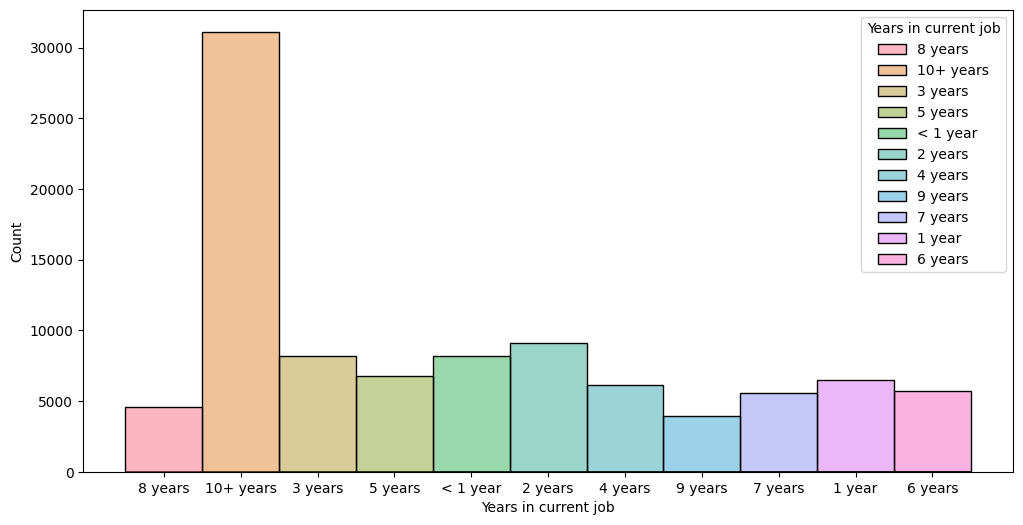

In [17]:
#Let check the years in current job
plt.figure(figsize = (12,6))
sns.histplot(df, x = 'Years in current job', hue = 'Years in current job')


In [18]:
#Seem like 10+ years has the largest number, we can fill na with this value
df['Years in current job'].fillna('10+ years', inplace = True)

In [19]:
_na()

,total,percent
Credit Score,19154,19.154
Annual Income,19154,19.154


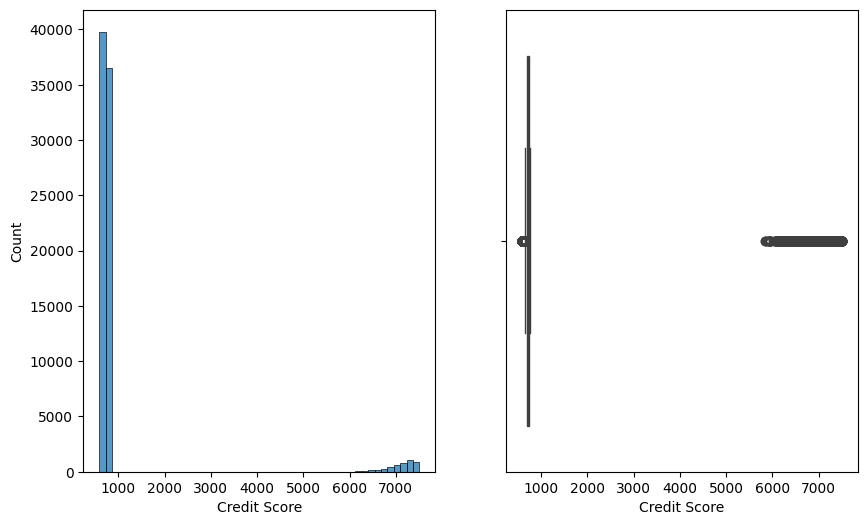

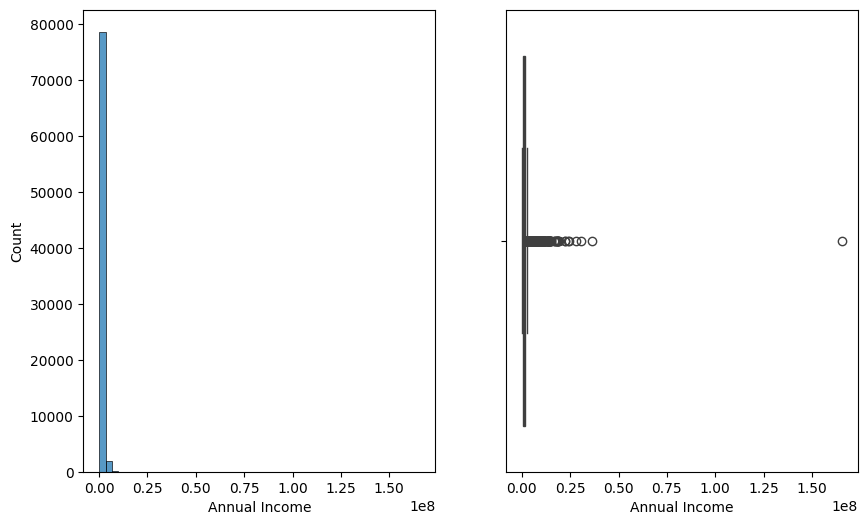

In [20]:
#Let's check the remaining columns
my_l = ['Credit Score', 'Annual Income']
for j, i in enumerate(my_l):
    fig, ax = plt.subplots(1,2,figsize = (10,6))
    sns.histplot(df, x = i, bins = 50, ax = ax[0])
    sns.boxplot(df, x = i, ax = ax[1])
    plt.show()


In [21]:
#Credit score và annual có lượng ngoại lai khá lớn và có giá trị ngoại lai lớn
#Nên chúng ta sẽ để những giá trị na là Median
for i in my_l: 
    df[i].fillna(df[i].median(), inplace = True)


In [22]:
_na()

,total,percent


## 2.2. Deal with duplicate values

In [23]:
df.duplicated().sum()
#We have 10215 duplicate values

10215

In [24]:
#Drop dulicate values
df.drop_duplicates(inplace = True)

In [25]:
df.duplicated().sum()

0

## 2.3. Change data type 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89785 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89785 non-null  object 
 1   Current Loan Amount        89785 non-null  float64
 2   Term                       89785 non-null  object 
 3   Credit Score               89785 non-null  float64
 4   Annual Income              89785 non-null  float64
 5   Years in current job       89785 non-null  object 
 6   Home Ownership             89785 non-null  object 
 7   Purpose                    89785 non-null  object 
 8   Monthly Debt               89785 non-null  float64
 9   Years of Credit History    89785 non-null  float64
 10  Number of Open Accounts    89785 non-null  float64
 11  Number of Credit Problems  89785 non-null  float64
 12  Current Credit Balance     89785 non-null  float64
 13  Maximum Open Credit        89785 non-null  float64


In [27]:
#Change years in current job to numerical
df['Years in current job'] = df['Years in current job'].apply(lambda x: '11 years' if x == '10+ years' else '0.5 year'
                                                             if x == '< 1 year' else x)
df['Years in current job'] = df['Years in current job'].str.split().apply(lambda x: x[0])

In [28]:
df['Years in current job'] = df['Years in current job'].astype(float)
df['Years in current job']

0         8.0
1        11.0
2         8.0
3         3.0
4         5.0
         ... 
99994     1.0
99996     1.0
99997     6.0
99998     9.0
99999    11.0
Name: Years in current job, Length: 89785, dtype: float64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89785 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Status                89785 non-null  object 
 1   Current Loan Amount        89785 non-null  float64
 2   Term                       89785 non-null  object 
 3   Credit Score               89785 non-null  float64
 4   Annual Income              89785 non-null  float64
 5   Years in current job       89785 non-null  float64
 6   Home Ownership             89785 non-null  object 
 7   Purpose                    89785 non-null  object 
 8   Monthly Debt               89785 non-null  float64
 9   Years of Credit History    89785 non-null  float64
 10  Number of Open Accounts    89785 non-null  float64
 11  Number of Credit Problems  89785 non-null  float64
 12  Current Credit Balance     89785 non-null  float64
 13  Maximum Open Credit        89785 non-null  float64


In [30]:
#Let check other object columns 
for i in ['Term', 'Home Ownership', 'Purpose']:
    print(f'{i} {df[i].unique()}')

Term ['Short Term' 'Long Term']
Home Ownership ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage']
Purpose ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy']


In [31]:
#All off these should be categorical_feature
categorical_feature = ['Term', 'Home Ownership', 'Purpose']

In [32]:
df_tree = df.copy()

# III. Exploratory Data Analysis

## 3.1. Target feature

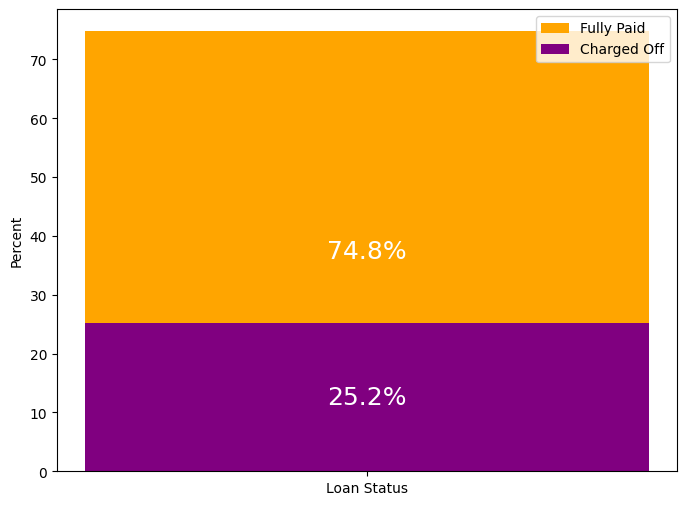

In [33]:
df_target = df.groupby('Loan Status').size().reset_index(name = 'Total')
df_target.columns = ['Loan Status', 'Total']
df_target['Percent'] = (100*df_target['Total']/len(df)).round(2) 
fig, ax =plt.subplots(figsize = (8,6))
ax2 = ax.bar('Loan Status', df_target[df_target['Loan Status'] == 'Fully Paid']['Percent'].values[0], color = 'orange', label = 'Fully Paid')
ax1 = ax.bar('Loan Status', df_target[df_target['Loan Status'] == 'Charged Off']['Percent'].values[0], color = 'purple', label = 'Charged Off')


for p in ax1.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=18, color='white', xytext=(0, 0),
                        textcoords='offset points') 
for p in ax2.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=18, color='white', xytext=(0, 0),
                        textcoords='offset points') 

ax.set_ylabel('Percent')
ax.legend()

In [34]:
#The target feature show that this is the imbalance target feature

## 3.2.Numerical Feature

In [35]:
numerical_feature = df.select_dtypes(include = [np.number]).columns.tolist()
len(numerical_feature)

dfm = df.copy()

In [36]:
dfm = dfm[(dfm['Current Loan Amount'] < 80000000) & (dfm['Credit Score'] < 1500)]
df = df[(df['Current Loan Amount'] < 80000000) & (df['Credit Score'] < 1500)]

In [37]:
dfm.shape

(73750, 16)

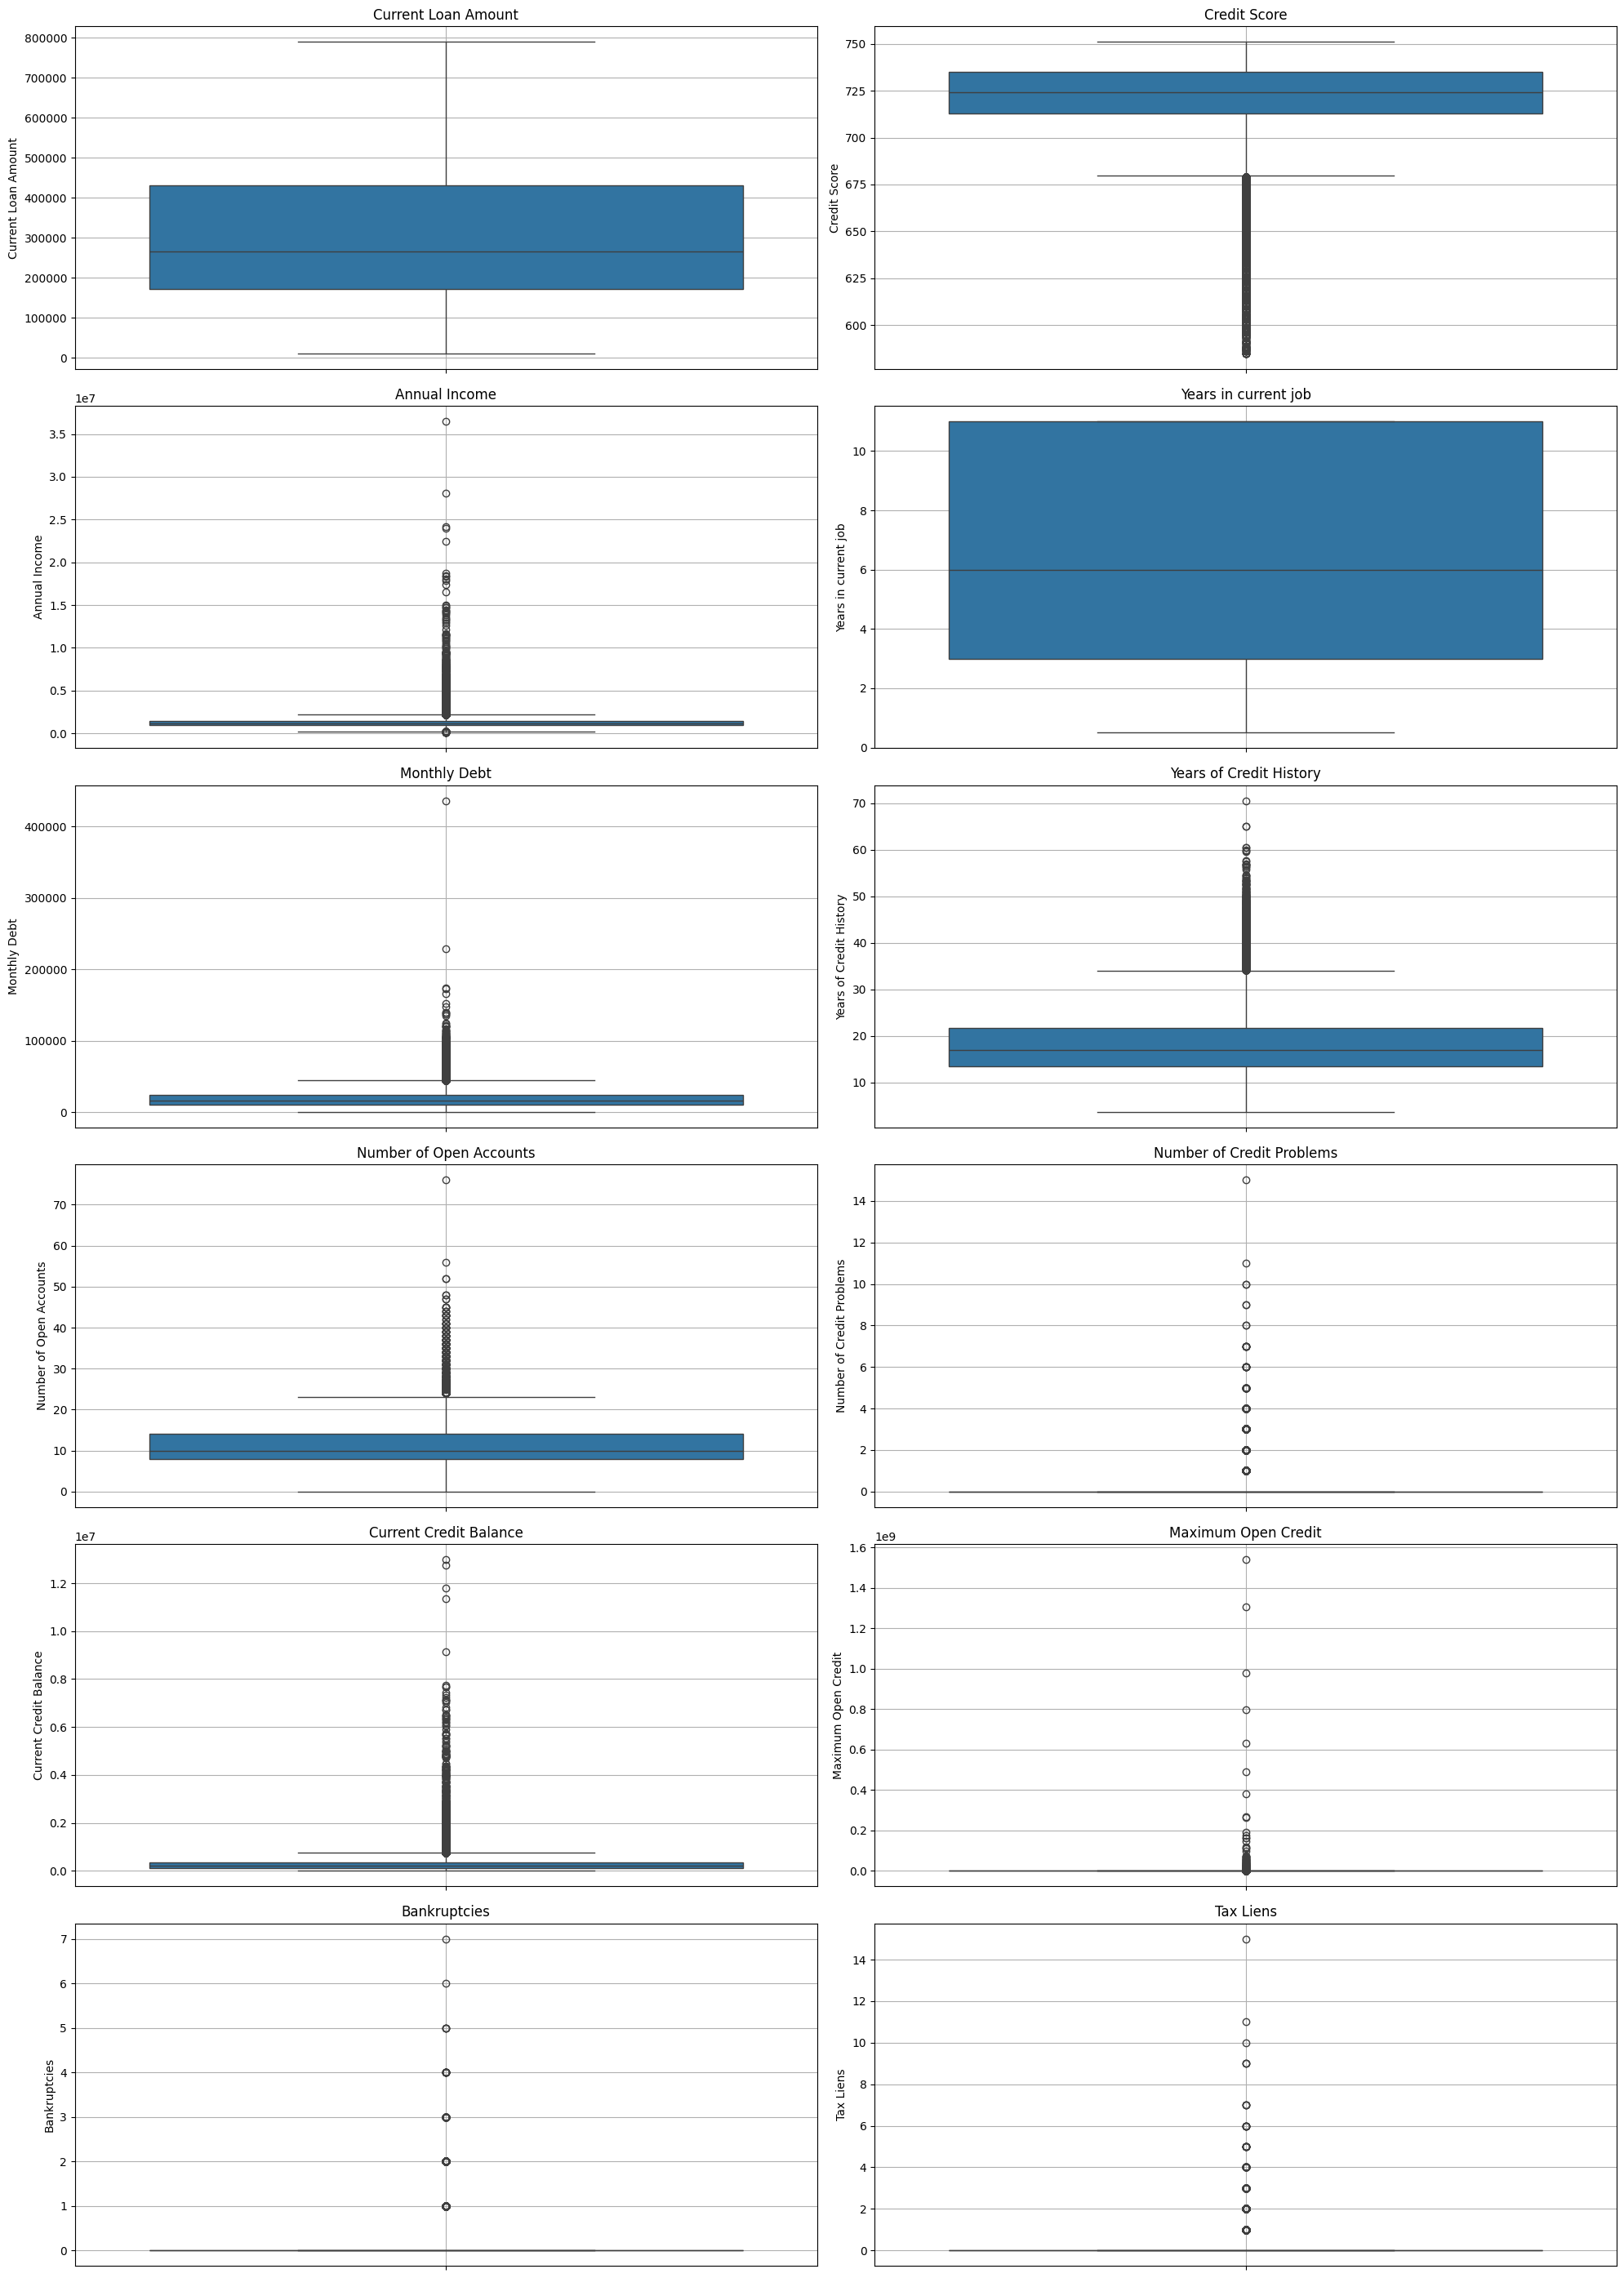

In [38]:
fig, ax = plt.subplots(6,2,figsize = (20,28))
for pos, i in enumerate(numerical_feature):  
    sns.boxplot(data = df, y = i, ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].grid(True)
    ax[pos//2, pos%2].set_title(i)
plt.tight_layout()
plt.show()

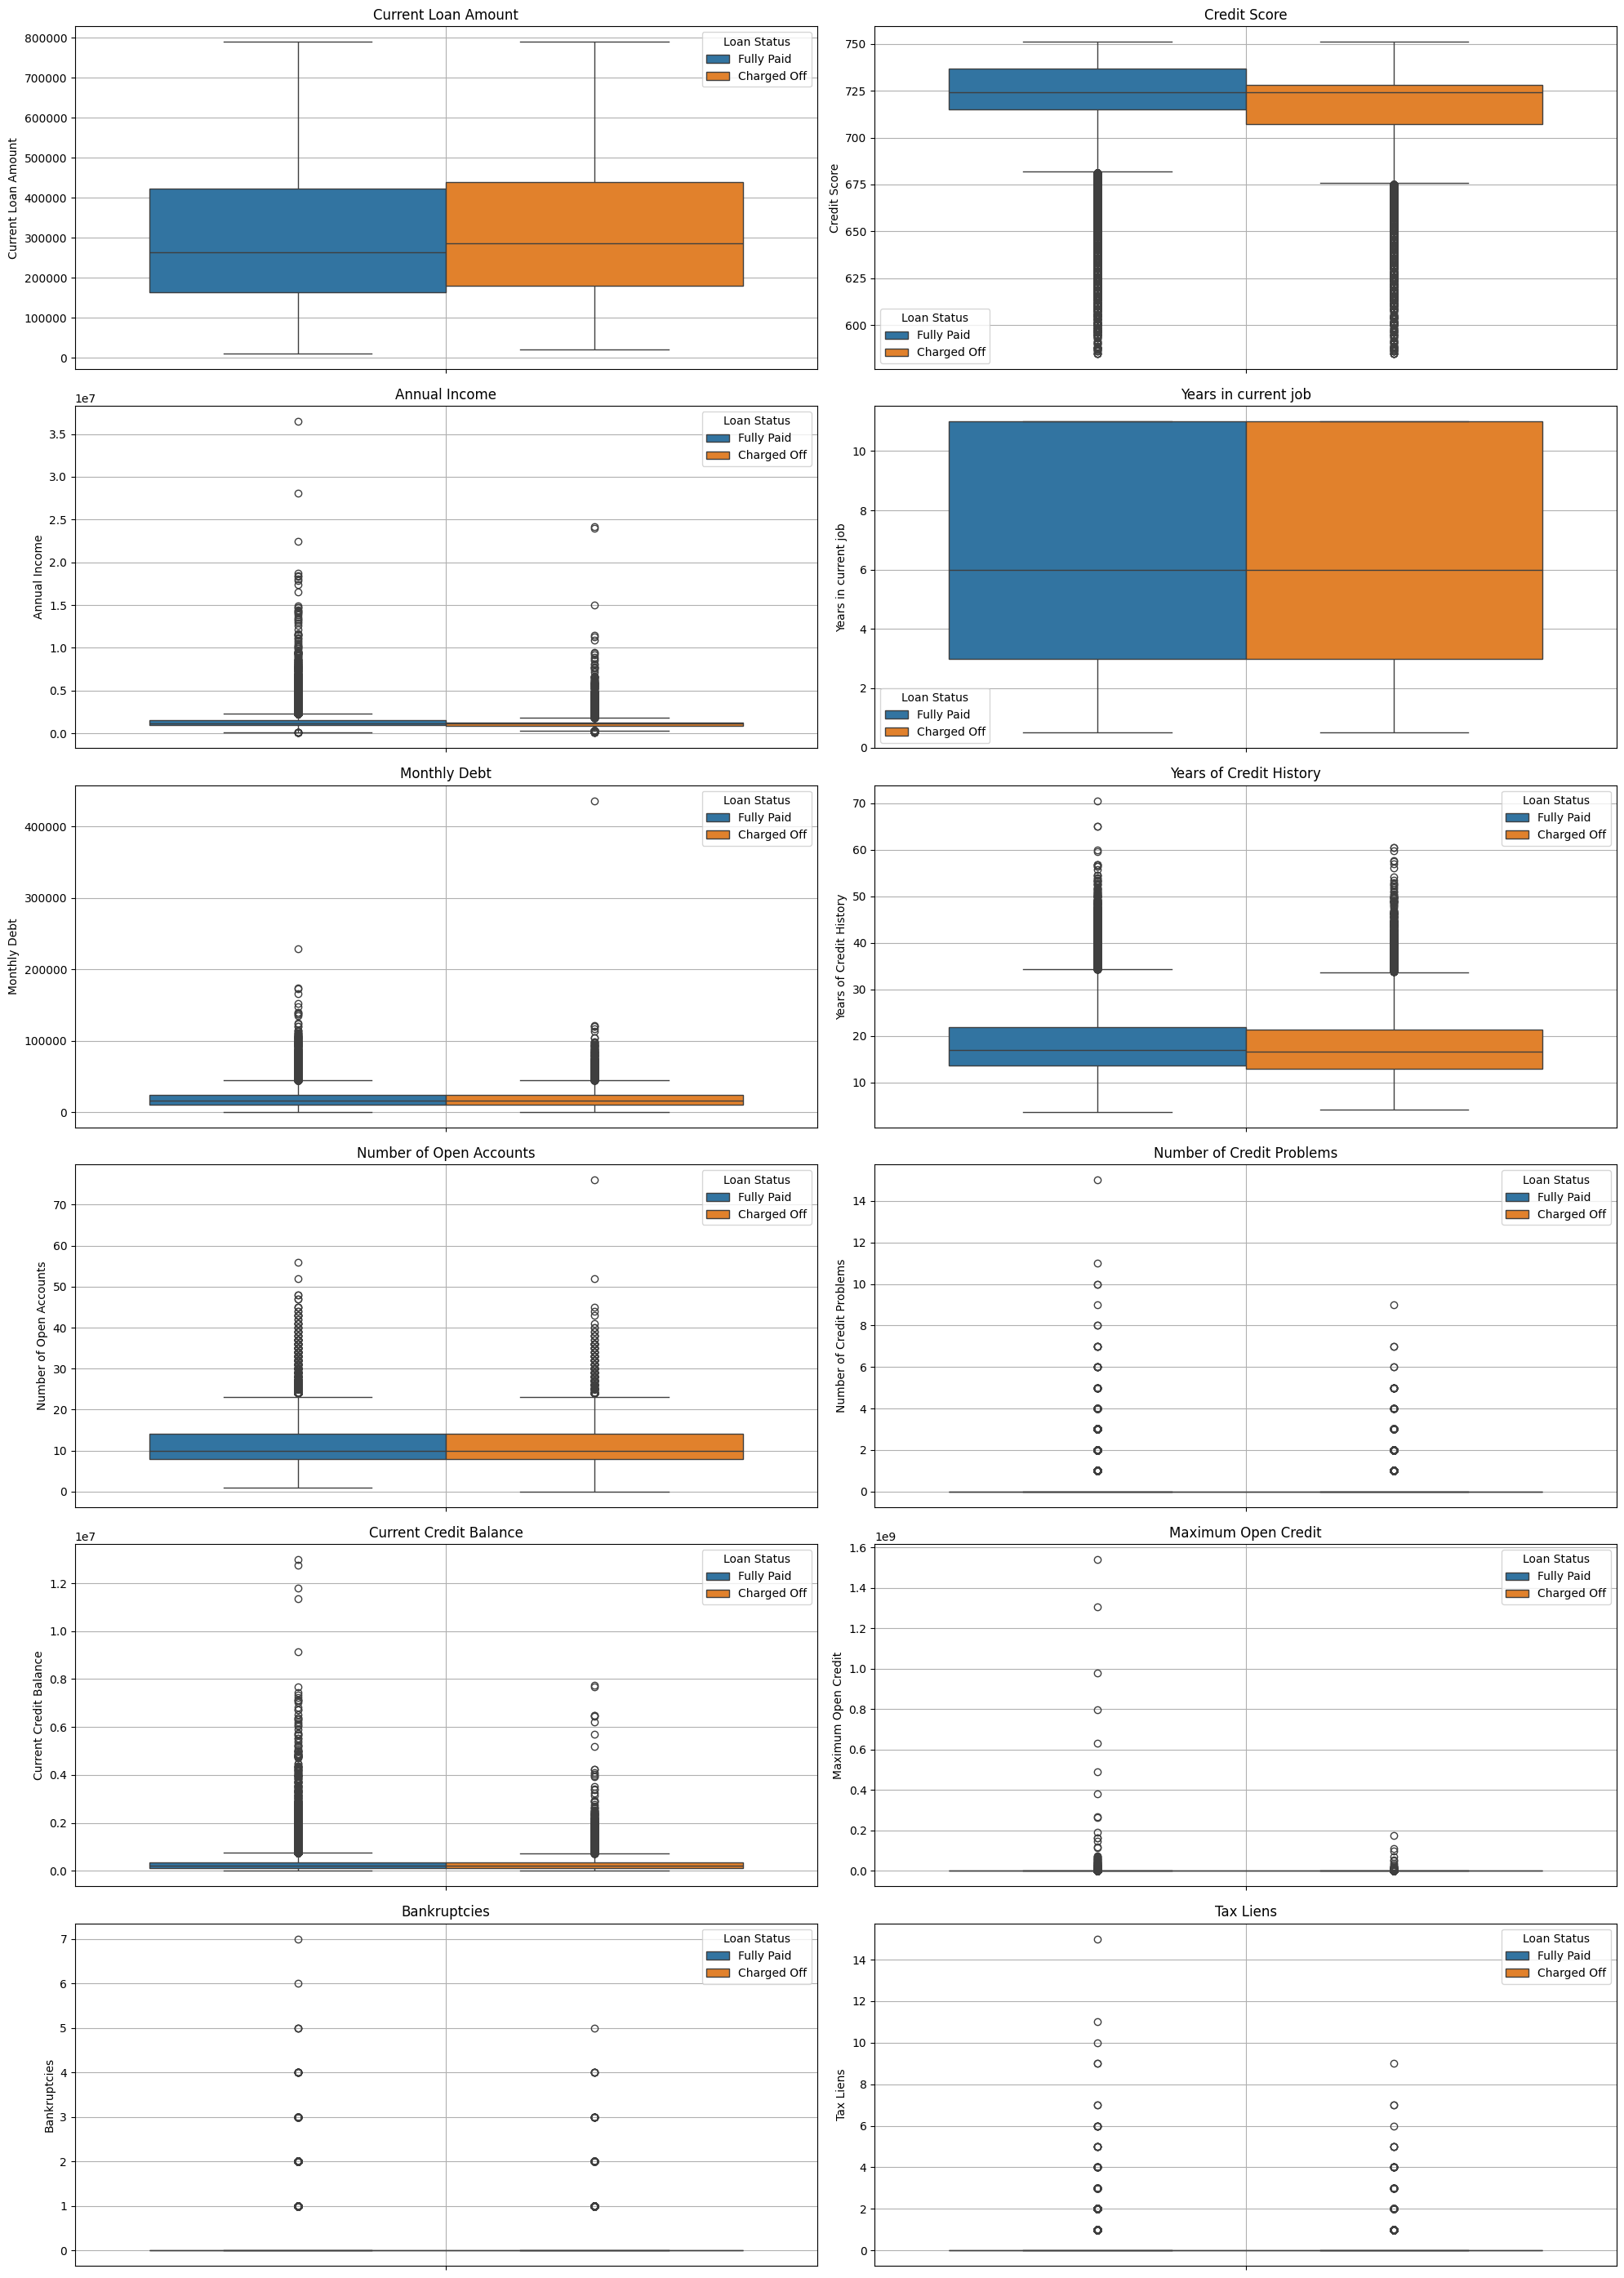

In [39]:
fig, ax = plt.subplots(6,2,figsize = (20,28))
for pos, i in enumerate(numerical_feature):  
    sns.boxplot(data = dfm, y = i, hue = 'Loan Status', ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].grid(True)
    ax[pos//2, pos%2].set_title(i)
plt.tight_layout()
plt.show()

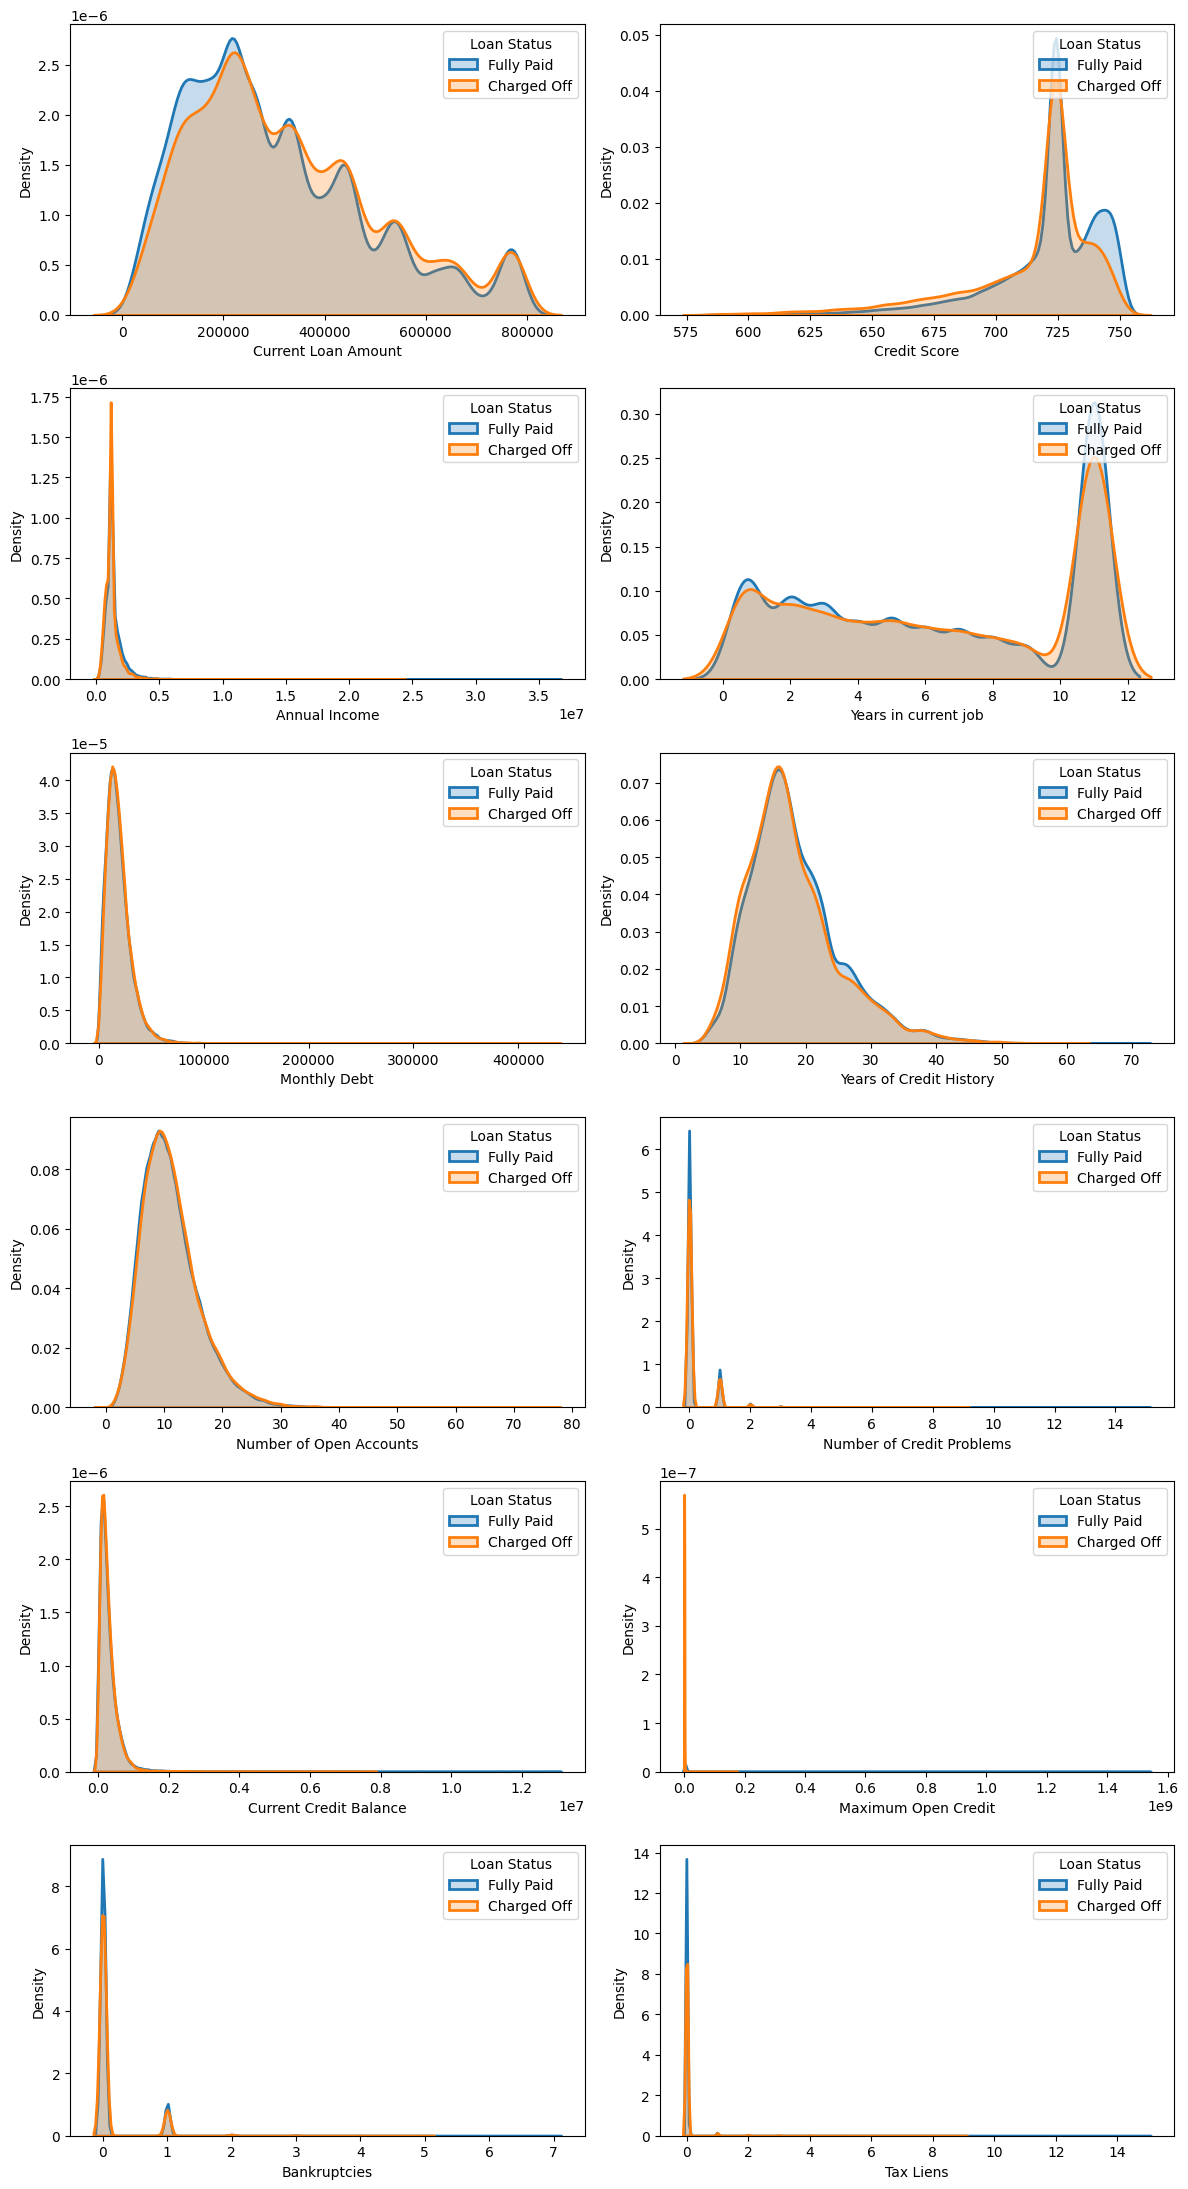

In [40]:
fig, ax = plt.subplots(6,2, figsize = (12,22))
for pos, i in enumerate(numerical_feature):
    sns.kdeplot(data = dfm[dfm['Loan Status'] == 'Fully Paid'], x = i, fill = True, linewidth =2,
               label = 'Fully Paid', ax = ax[pos//2, pos%2])
    sns.kdeplot(data = dfm[dfm['Loan Status'] == 'Charged Off'], x = i, fill = True, linewidth =2,
               label = 'Charged Off', ax = ax[pos//2, pos%2])
    ax[pos//2, pos%2].legend(title = 'Loan Status')
plt.tight_layout()
plt.show()

In [41]:
df_loan = df[df['Current Loan Amount'] < 250000]
df_loan_gr = df_loan.groupby('Loan Status')['Current Loan Amount'].size().reset_index(name = 'count')
df_loan_gr['percent'] = (100*(df_loan_gr['count']/df_loan.shape[0])).round(2)
df_loan_gr = df_loan_gr.sort_values('percent', ascending = False)

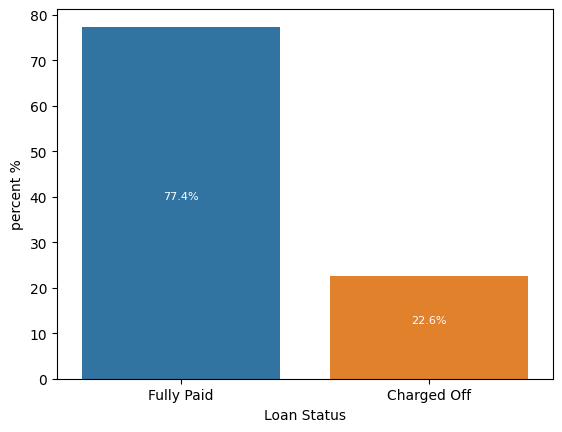

In [42]:
ax = sns.barplot(df_loan_gr, x = 'Loan Status', y = 'percent', hue = 'Loan Status')
plt.ylabel('percent %')
for p in ax.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 5),
                        textcoords='offset points') 

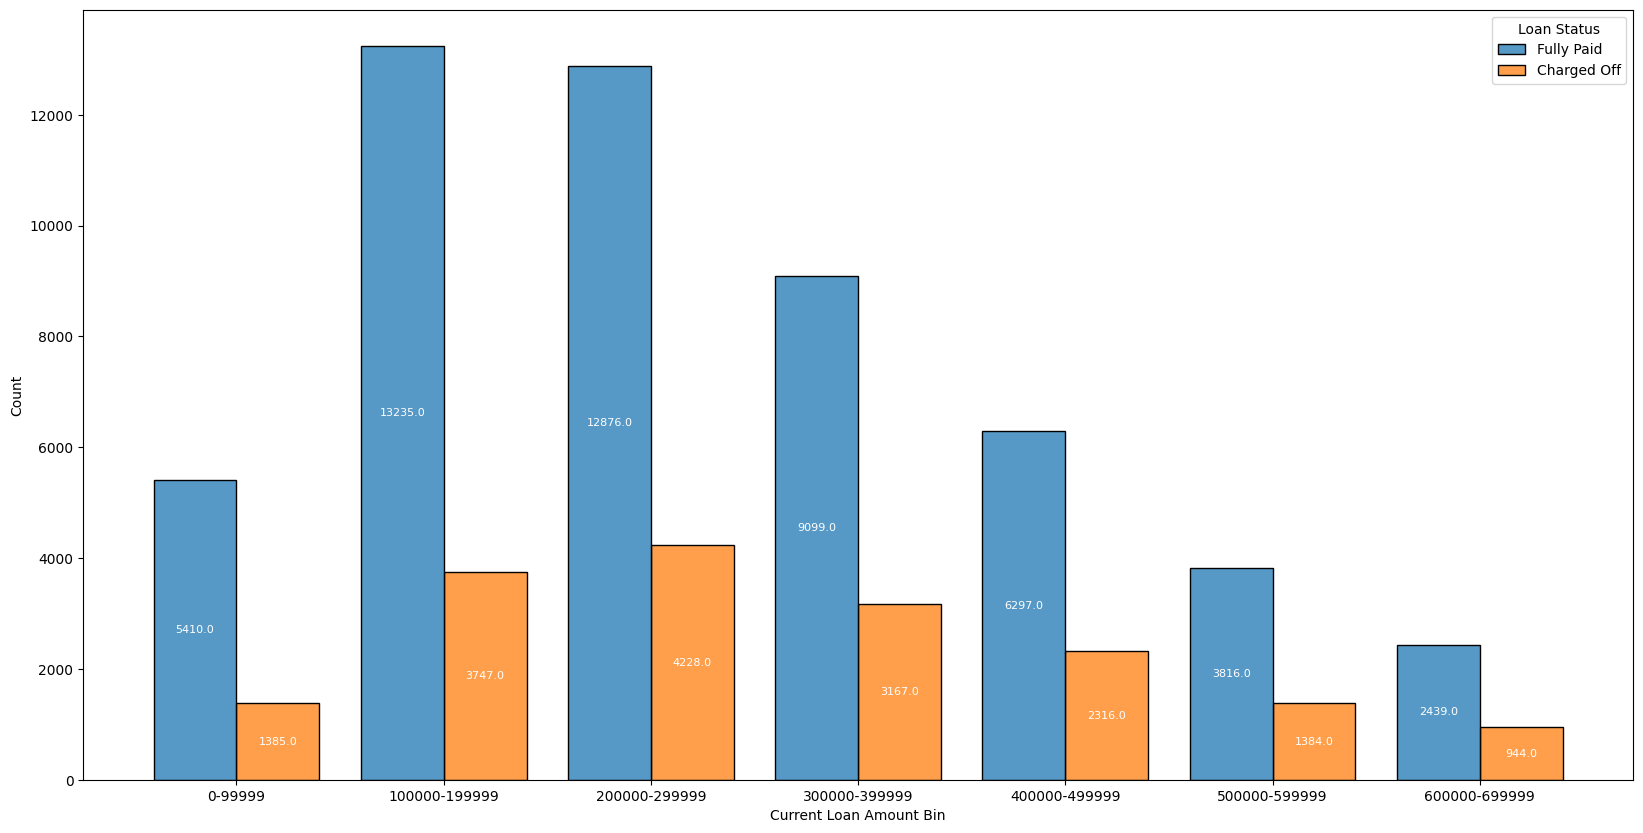

In [43]:
bins = range(0, 800000, 100000)
bin_labels = [f'{b}-{b + 99999}' for b in bins[:-1]]

# Tạo cột bin cho DataFrame và thêm label cho từng bin
df_loan_amount = df.copy()
df_loan_amount['Current Loan Amount Bin'] = pd.cut(df_loan_amount['Current Loan Amount'], bins=bins, labels=bin_labels)

# Vẽ biểu đồ histogram với seaborn
plt.figure(figsize=(20, 10))
ax = sns.histplot(df_loan_amount, x='Current Loan Amount Bin', hue='Loan Status', multiple='dodge', shrink=0.8)
for p in ax.patches:
        count = p.get_height()
        if count != 0:  # Kiểm tra giá trị khác 0
            ax.annotate(f'{count:.1f}', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 0),
                        textcoords='offset points') 


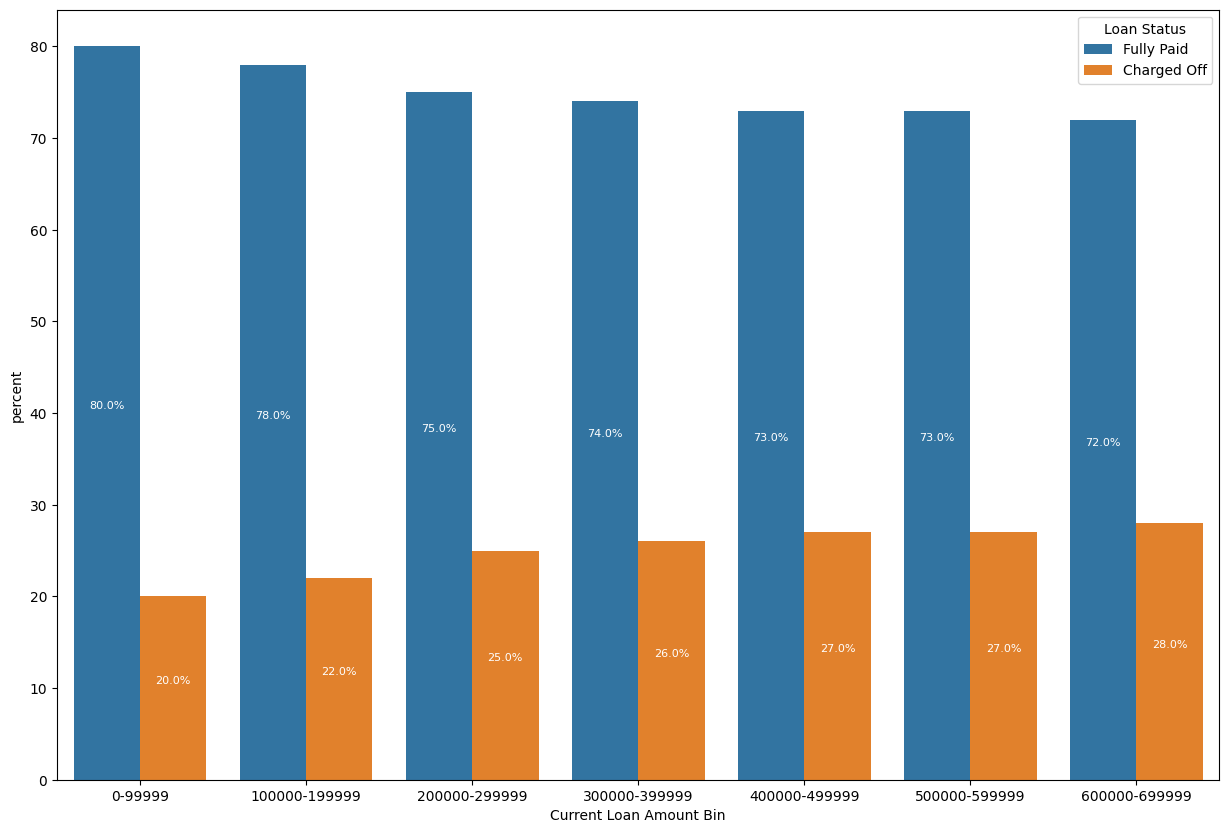

In [44]:
df_loan_amount_gr = df_loan_amount.groupby(['Current Loan Amount Bin', 'Loan Status']).size().reset_index(name = 'total')
df_loan_amount_pc = df_loan_amount.groupby(['Current Loan Amount Bin']).size().reset_index(name = 'total_loan')
df_loan_final = pd.merge(df_loan_amount_gr,df_loan_amount_pc, how = 'inner', on = 'Current Loan Amount Bin')
df_loan_final['percent'] = 100*(df_loan_final['total']/df_loan_final['total_loan']).round(2)
df_loan_final.sort_values('Loan Status', ascending = False,inplace = True)
plt.figure(figsize = (15,10))
ax = sns.barplot(df_loan_final, x = 'Current Loan Amount Bin', y ='percent', hue = 'Loan Status')
for p in ax.patches:
        percentage = p.get_height()
        if percentage != 0:  # Kiểm tra giá trị khác 0
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 5),
                        textcoords='offset points') 


#### Credit Score

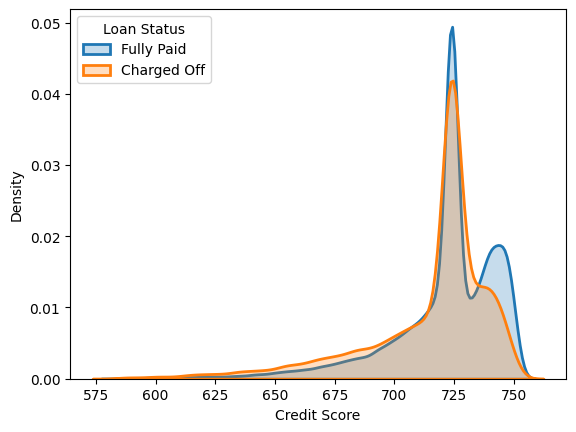

In [45]:
sns.kdeplot(data = df[df['Loan Status'] == 'Fully Paid'], x = 'Credit Score', fill = True, linewidth =2,
               label = 'Fully Paid')
sns.kdeplot(data = df[df['Loan Status'] == 'Charged Off'], x = 'Credit Score', fill = True, linewidth =2,
               label = 'Charged Off')
plt.legend(title = 'Loan Status', loc = 'upper left')

#### comment
- Trong khoảng 200000, mật độ của Current Loan Amount cao ở cả hai nhóm, nhưng fully paid có chút nhỉnh hơn
- Ta thấy biểu đồ credit score có sự khác biệt giữa điểm tín dụng của fully paid và charged off
Điểm số càng cao, tỉ lệ fully paid càng lớn
- Số năm làm việc trong công việc hiện tại > 10 năm có mật độ fully paid cao hơn so với charged off
- Number of credit problem/ Fully Paid/ Tax Liéns : Fully paid tập trung lớn ở mức  0 

22219    Fully Paid
29583    Fully Paid
Name: Loan Status, dtype: object

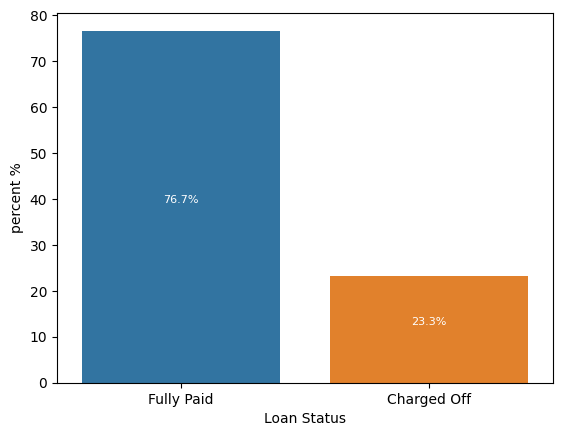

In [46]:
df_score = df[(df['Credit Score'] < 750) & (df['Credit Score'] > 710)]
df_score_gr = df_score.groupby('Loan Status')['Credit Score'].size().reset_index(name = 'count')
df_score_gr['percent'] = (100*(df_score_gr['count']/df_score.shape[0])).round(2)
df_score_gr = df_score_gr.sort_values('percent', ascending = False)
ax = sns.barplot(df_score_gr, x = 'Loan Status', y = 'percent', hue = 'Loan Status')
plt.ylabel('percent %')
for p in ax.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 5),
                        textcoords='offset points') 

dfm[dfm['Tax Liens'] > 10]['Loan Status']

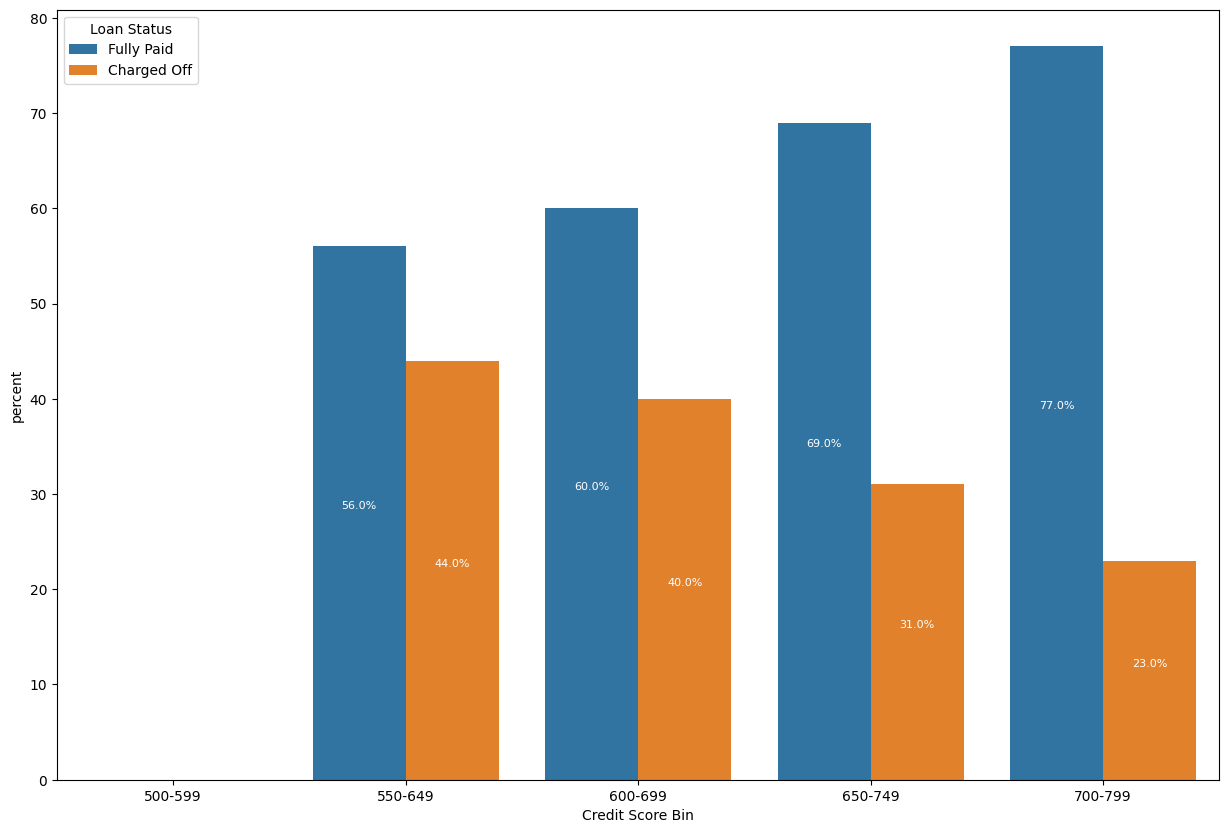

In [47]:
bins = range(500, 800, 50)
bin_labels = [f'{b}-{b + 99}' for b in bins[:-1]]

# Tạo cột bin cho DataFrame và thêm label cho từng bin
df_score = df.copy()
df_score['Credit Score Bin'] = pd.cut(df_score['Credit Score'], bins=bins, labels=bin_labels)
df_score_gr = df_score.groupby(['Credit Score Bin', 'Loan Status']).size().reset_index(name = 'total')
df_score_pc = df_score.groupby(['Credit Score Bin']).size().reset_index(name = 'total_score')
df_score_final = pd.merge(df_score_gr,df_score_pc, how = 'inner', on = 'Credit Score Bin')
df_score_final['percent'] = 100*(df_score_final['total']/df_score_final['total_score']).round(2)
df_score_final.sort_values('Loan Status', ascending = False,inplace = True)
plt.figure(figsize = (15,10))
ax = sns.barplot(df_score_final, x = 'Credit Score Bin', y ='percent', hue = 'Loan Status')
for p in ax.patches:
        percentage = p.get_height()
        if percentage != 0:  # Kiểm tra giá trị khác 0
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 5),
                        textcoords='offset points') 

#### Annual Income

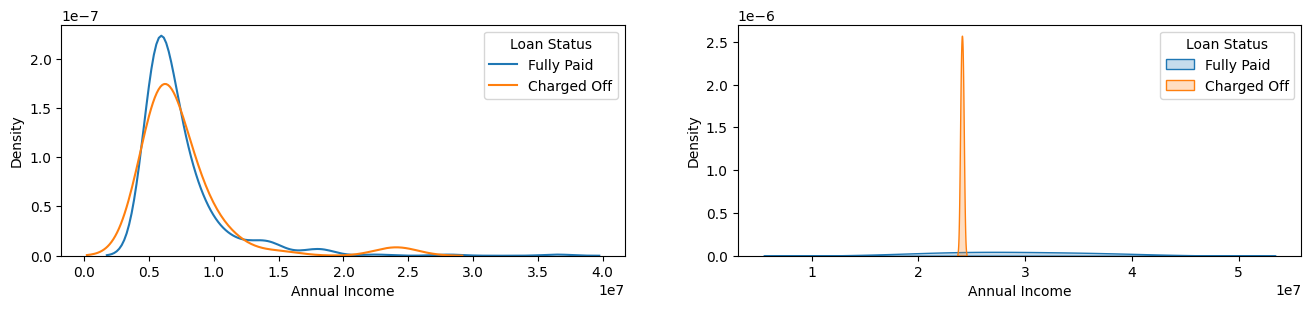

In [48]:
fig, ax = plt.subplots(1,2, figsize = (16,3))
sns.kdeplot(data = df[(df['Loan Status'] == 'Fully Paid') & (df['Annual Income'] > 5000000)], x = 'Annual Income', label = 'Fully Paid', ax = ax[0])
sns.kdeplot(data = df[(df['Loan Status'] == 'Charged Off') & (df['Annual Income'] > 5000000)], x = 'Annual Income', label = 'Charged Off', ax = ax[0])
ax[0].legend(title = 'Loan Status')

sns.kdeplot(data = df[(df['Loan Status'] == 'Fully Paid') & (df['Annual Income'] > 20000000)], x = 'Annual Income', fill = True, label = 'Fully Paid', ax = ax[1])
sns.kdeplot(data = df[(df['Loan Status'] == 'Charged Off') & (df['Annual Income'] > 20000000)], x = 'Annual Income', fill = True, label = 'Charged Off', ax = ax[1])
ax[1].legend(title = 'Loan Status')

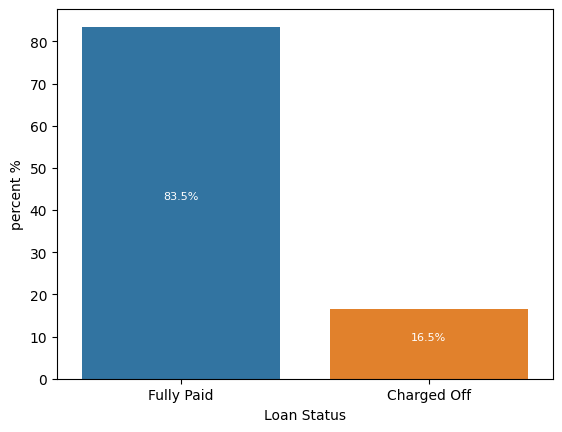

In [49]:
df_income = df[(df['Annual Income'] > 3000000)]
df_income_gr = df_income.groupby('Loan Status')['Annual Income'].size().reset_index(name = 'count')
df_income_gr['percent'] = (100*(df_income_gr['count']/df_income.shape[0])).round(2)
df_income_gr = df_income_gr.sort_values('percent', ascending = False)
ax = sns.barplot(df_income_gr, x = 'Loan Status', y = 'percent', hue = 'Loan Status')
plt.ylabel('percent %')
for p in ax.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 5),
                        textcoords='offset points') 

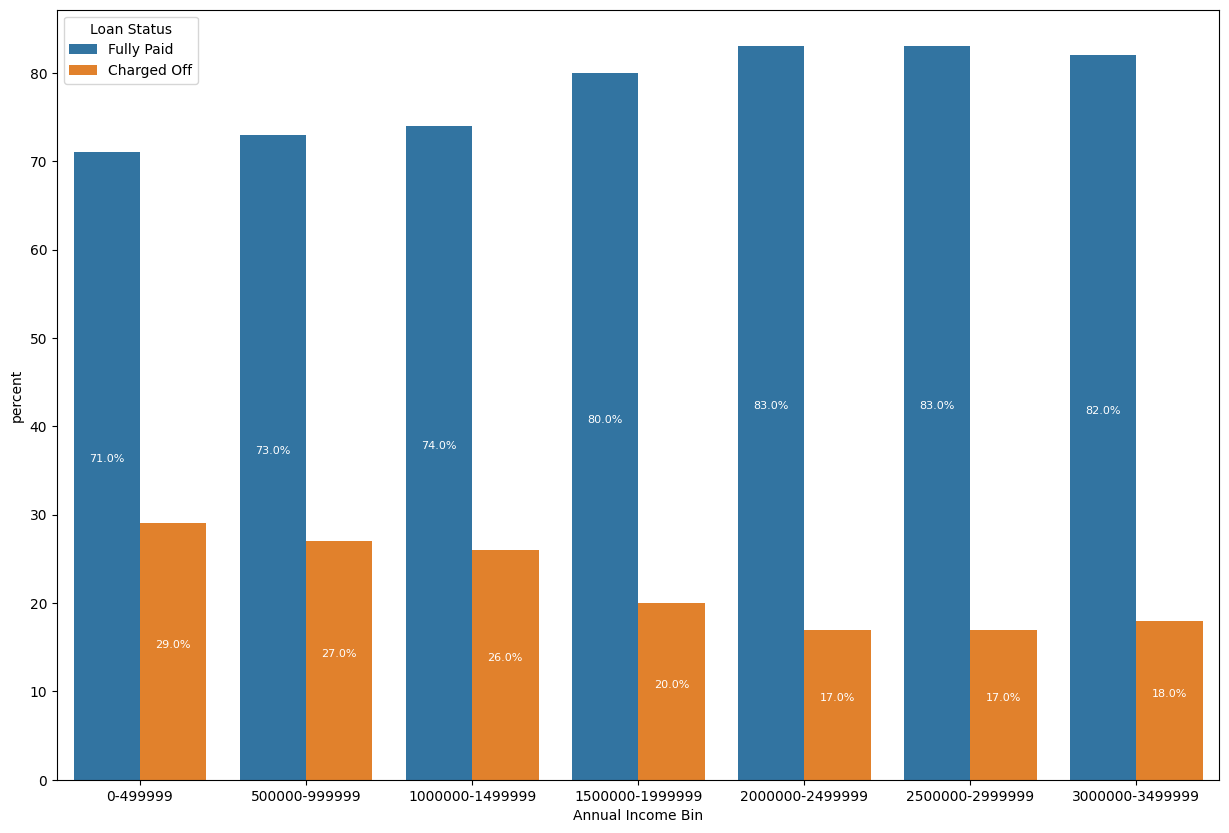

In [50]:
bins = range(0, 4000000, 500000)
bin_labels = [f'{b}-{b + 499999}' for b in bins[:-1]]

# Tạo cột bin cho DataFrame và thêm label cho từng bin
df_income = df.copy()
df_income['Annual Income Bin'] = pd.cut(df_score['Annual Income'], bins=bins, labels=bin_labels)
df_income_gr = df_income.groupby(['Annual Income Bin', 'Loan Status']).size().reset_index(name = 'total')
df_income_pc = df_income.groupby(['Annual Income Bin']).size().reset_index(name = 'total_income')
df_income_final = pd.merge(df_income_gr,df_income_pc, how = 'inner', on = 'Annual Income Bin')
df_income_final['percent'] = 100*(df_income_final['total']/df_income_final['total_income']).round(2)
df_income_final.sort_values('Loan Status', ascending = False,inplace = True)
plt.figure(figsize = (15,10))
ax = sns.barplot(df_income_final, x = 'Annual Income Bin', y ='percent', hue = 'Loan Status')
for p in ax.patches:
        percentage = p.get_height()
        if percentage != 0:  # Kiểm tra giá trị khác 0
            ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 5),
                        textcoords='offset points') 

<Axes: xlabel='Annual Income', ylabel='Annual Income'>

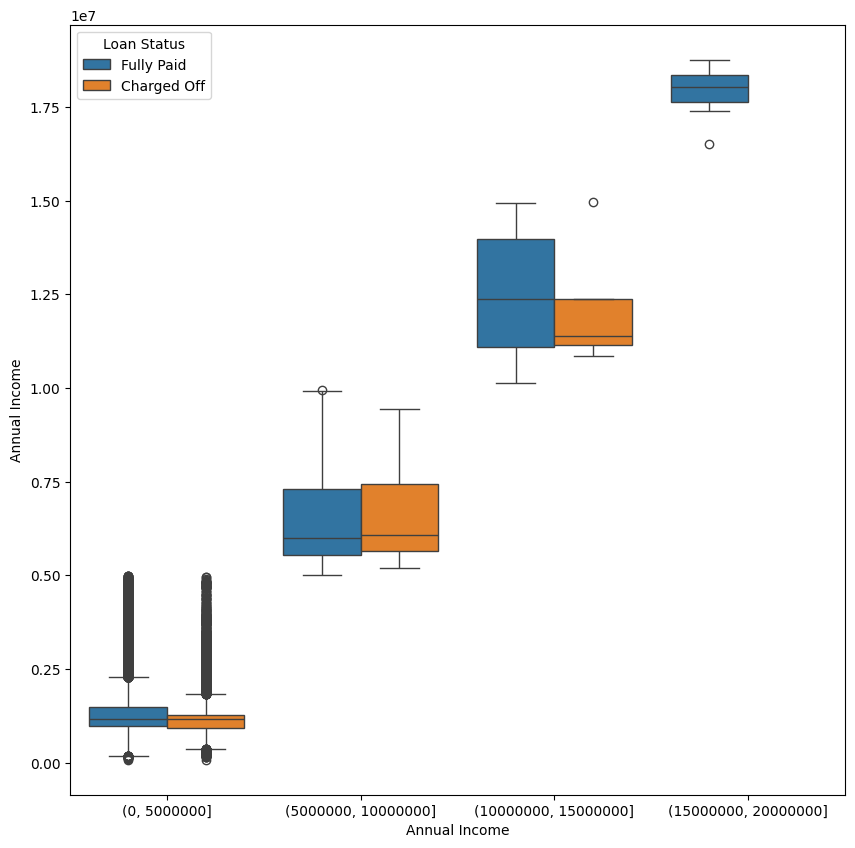

In [51]:
bins = range(0,25000000, 5000000)
plt.figure(figsize = (10,10))
x_ = pd.cut(df['Annual Income'], bins = bins)
sns.boxplot(df, x = x_, y = 'Annual Income', hue = 'Loan Status')

## 3.3. Categorical Feature

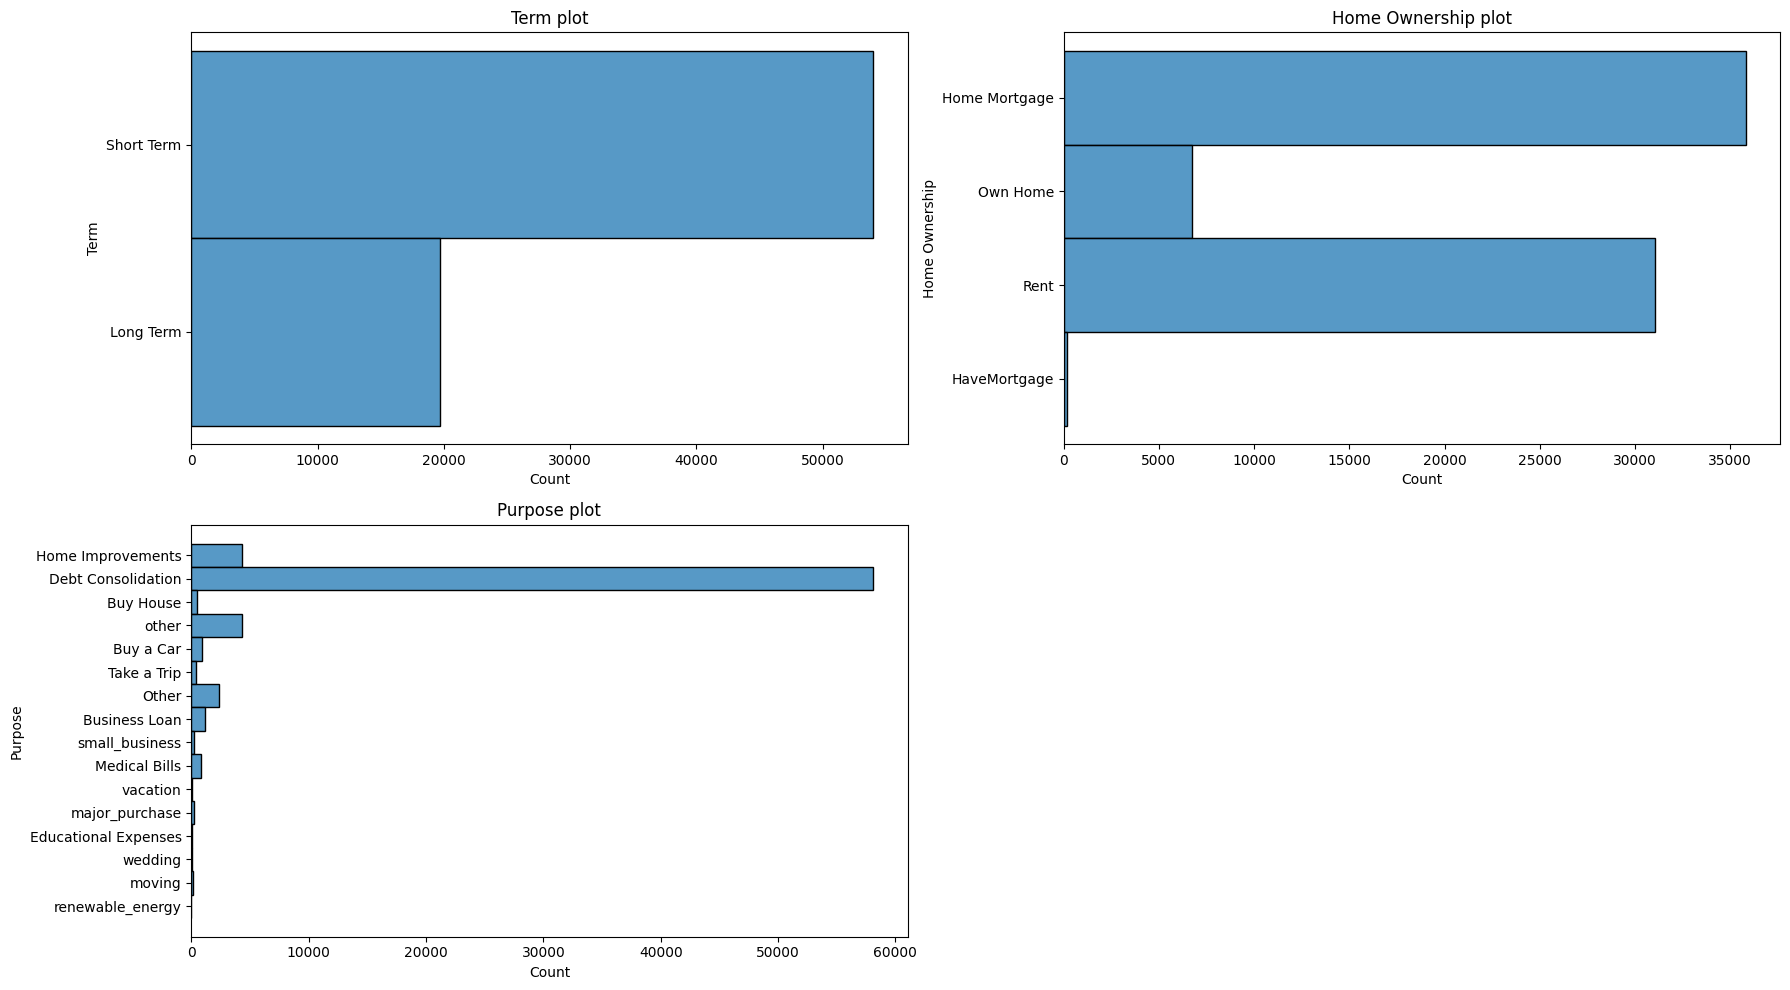

In [52]:
dfm['Purpose'] = dfm['Purpose'].replace('other', 'Other')
fig, ax = plt.subplots(2,2, figsize = (18,10))
for pos, i in enumerate(categorical_feature): 
    sns.histplot(df, y = i, ax = ax[pos//2, pos %2], multiple = 'stack', stat = 'count' )
    ax[pos//2, pos %2].set_title(f'{i} plot')    
for pos in range(len(categorical_feature), 2*2):
    fig.delaxes(ax[pos//2, pos %2])
plt.tight_layout()
plt.show()

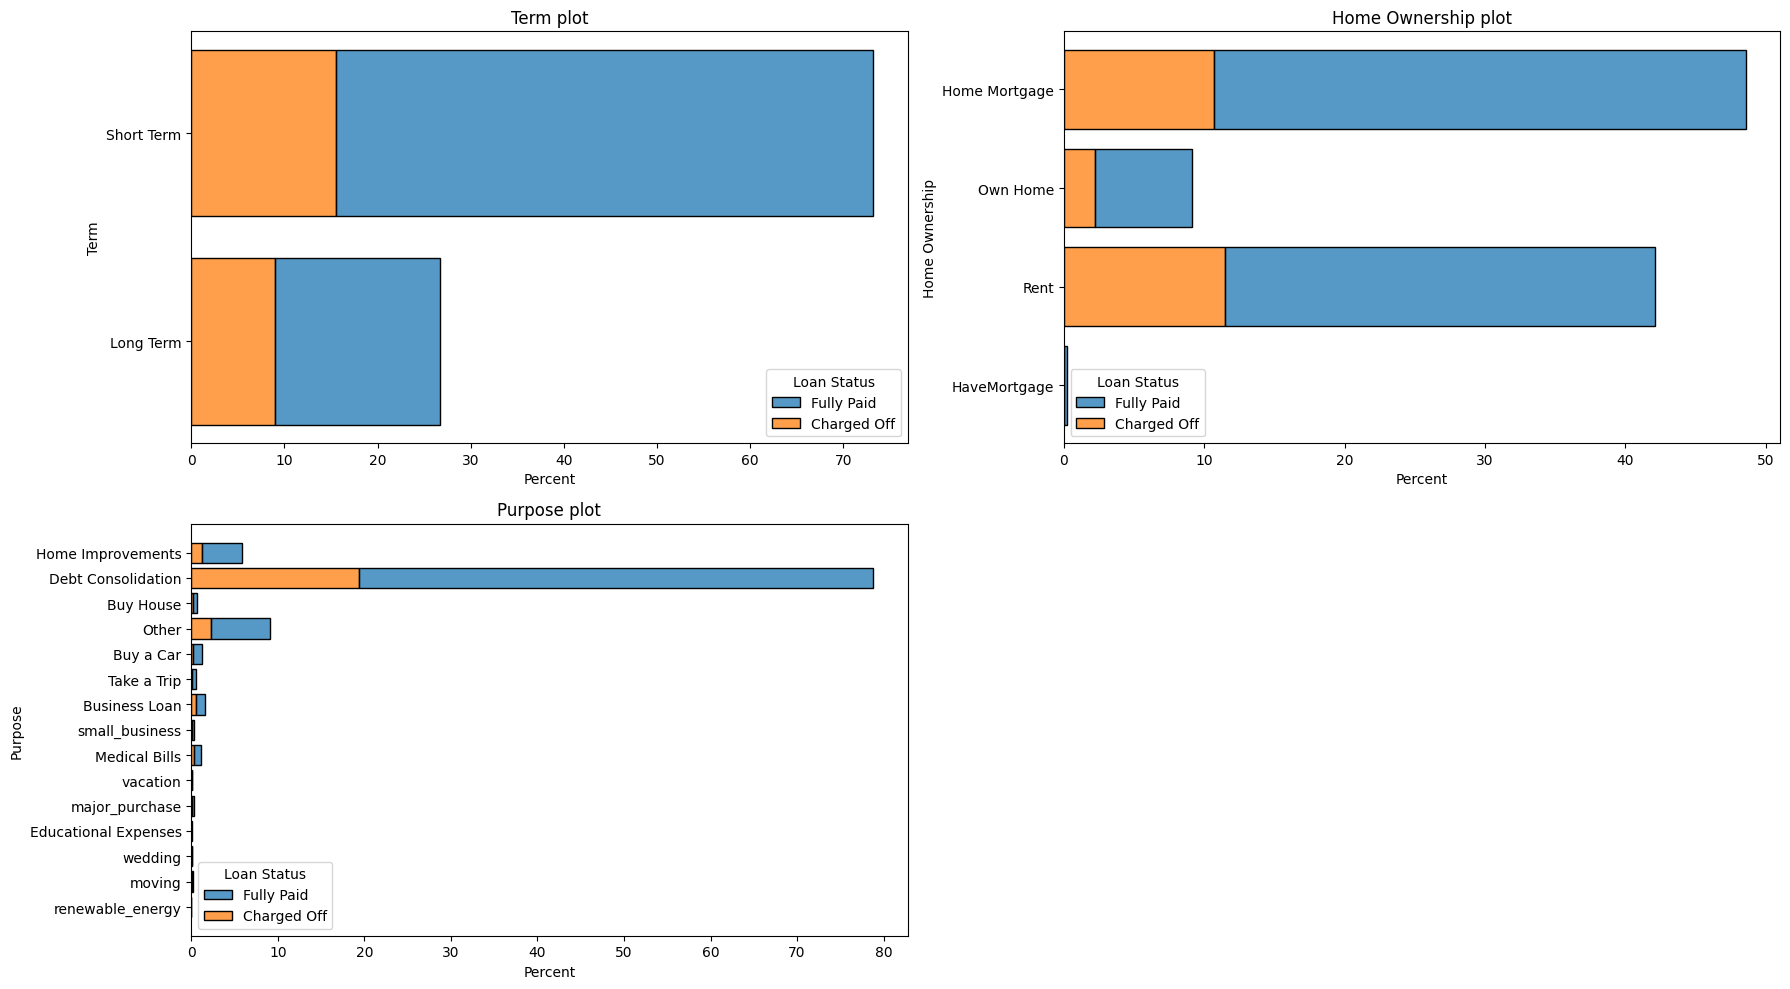

In [53]:
categorical_feature = dfm.select_dtypes(include = [object]).columns.tolist()
categorical_feature.remove('Loan Status')
categorical_feature
dfm['Purpose'] = dfm['Purpose'].replace('other', 'Other')
fig, ax = plt.subplots(2,2, figsize = (18,10))
for pos, i in enumerate(categorical_feature): 
    axp = sns.histplot(dfm, y = i, ax = ax[pos//2, pos %2], hue = 'Loan Status', multiple = 'stack', stat = 'percent',shrink=0.8 )
    ax[pos//2, pos %2].set_title(f'{i} plot')

for pos in range(len(categorical_feature), 2*2):
    fig.delaxes(ax[pos//2, pos %2])
    plt.tight_layout()
    
plt.tight_layout()
plt.show()

In [54]:
df_term = df.groupby(['Term','Loan Status']).size().reset_index(name = 'split_total')
df_term_total = df.groupby('Term').size().reset_index( name = 'total_all')
df_term_mg  = pd.merge(df_term, df_term_total, on = 'Term', how = 'left')
df_term_mg['percent'] = 100*(df_term_mg['split_total']/ df_term_mg['total_all']).round(2)
df_term_mg = df_term_mg.sort_values('percent', ascending = False)

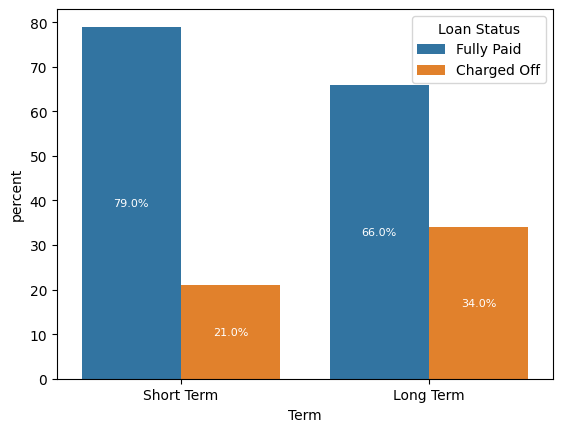

In [55]:
ax = sns.barplot(df_term_mg, x = 'Term', y = 'percent', hue = 'Loan Status')
for p in ax.patches:
    percentage = p.get_height()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 0),
                        textcoords='offset points') 

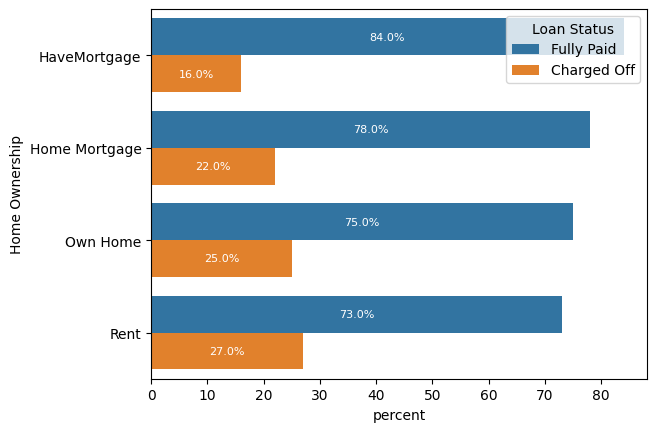

In [56]:
df_home = df.groupby(['Home Ownership','Loan Status']).size().reset_index(name = 'split_total')
df_home_total = df.groupby('Home Ownership').size().reset_index(name ='total_all')
df_home_mg = pd.merge(df_home, df_home_total, on = 'Home Ownership', how = 'left')
df_home_mg['percent'] = 100*(df_home_mg['split_total']/df_home_mg['total_all']).round(2)
df_home_mg = df_home_mg.sort_values('percent', ascending = False)
ax = sns.barplot(df_home_mg, y = 'Home Ownership', x = 'percent', hue = 'Loan Status')
for p in ax.patches:
    percentage = p.get_width()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_width()/2, p.get_y() + p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 0),
                        textcoords='offset points') 

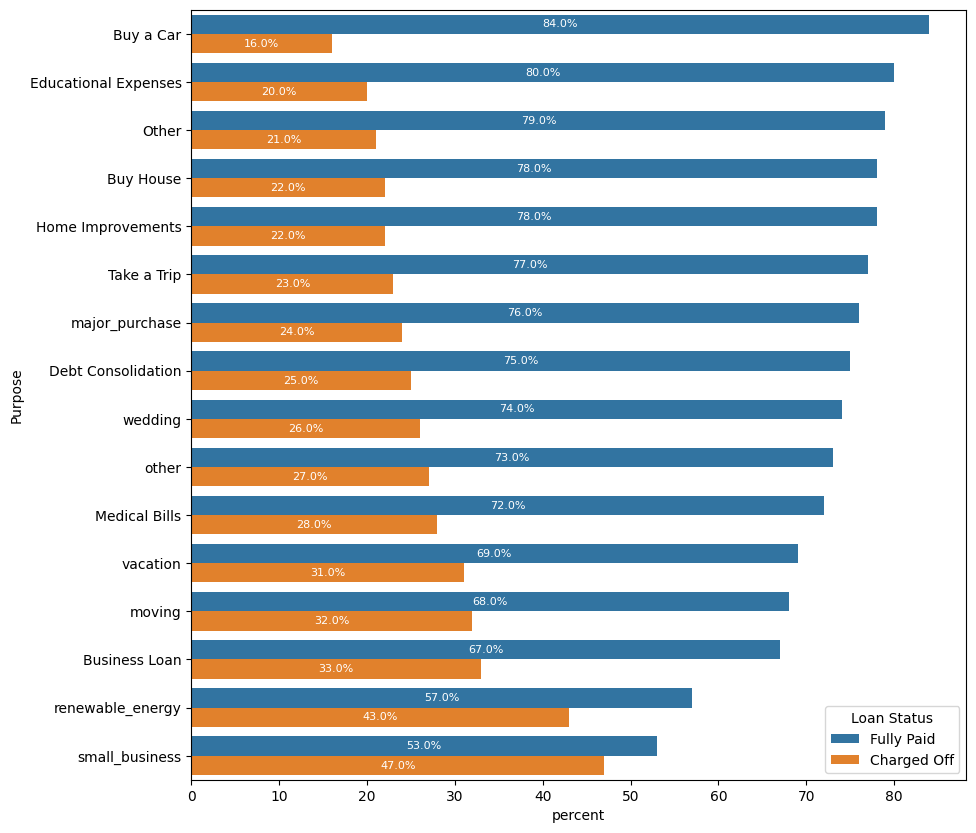

In [57]:
df_home = df.groupby(['Purpose','Loan Status']).size().reset_index(name = 'split_total')
df_home_total = df.groupby('Purpose').size().reset_index(name ='total_all')
df_home_mg = pd.merge(df_home, df_home_total, on = 'Purpose', how = 'left')
df_home_mg['percent'] = 100*(df_home_mg['split_total']/df_home_mg['total_all']).round(2)
df_home_mg = df_home_mg.sort_values('percent', ascending = False)
plt.figure(figsize = (10,10))
ax = sns.barplot(df_home_mg, y = 'Purpose', x = 'percent', hue = 'Loan Status')
for p in ax.patches:
    percentage = p.get_width()
    if percentage != 0:  # Kiểm tra giá trị khác 0
        ax.annotate(f'{percentage:.1f}%', (p.get_width()/2, p.get_y() + p.get_height() / 2),
                        ha='center', va='center', fontsize=8, color='white', xytext=(0, 0),
                        textcoords='offset points') 

In [58]:
df['Purpose'] = df['Purpose'].apply(lambda x: 'Other' if x == 'other' else x)

Text(0.5, 1.0, 'Rent')

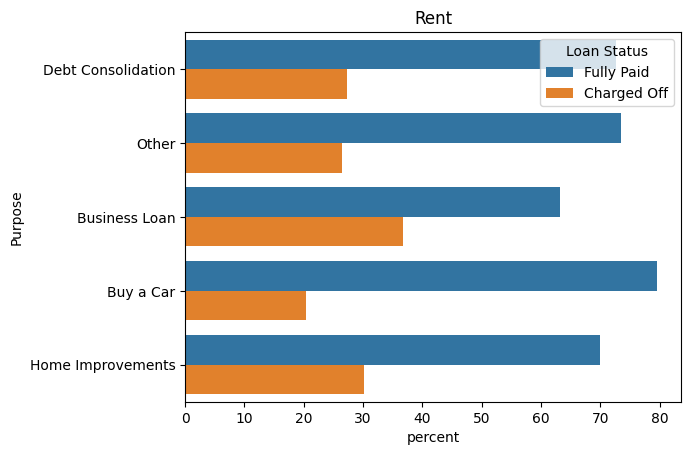

In [78]:
k = 'Rent'
x = df[df['Home Ownership'] == k].groupby(['Purpose','Loan Status']).size().reset_index(name = 'count').sort_values('count', ascending = False)
x_= df[df['Home Ownership'] == k].groupby('Purpose').size().reset_index(name = 'total').sort_values('total', ascending = False)
x = x_.merge(x, on = 'Purpose', how = 'inner')
x['percent'] = 100*(x['count']/x['total']).round(3)
sns.barplot(data = x.head(10), x = 'percent', y = 'Purpose', hue = 'Loan Status' )
plt.title(k)

In [70]:
x

,Purpose,total,Loan Status,count,percent
0,Debt Consolidation,28122,Fully Paid,21933,78.0
1,Debt Consolidation,28122,Charged Off,6189,22.0
2,Home Improvements,3371,Fully Paid,2652,78.7
3,Home Improvements,3371,Charged Off,719,21.3
4,Other,2561,Fully Paid,2010,78.5
5,Other,2561,Charged Off,551,21.5
6,Business Loan,571,Fully Paid,397,69.5
7,Business Loan,571,Charged Off,174,30.5
8,Buy a Car,390,Fully Paid,337,86.4
9,Buy a Car,390,Charged Off,53,13.6


# IV. Model Selection - Feature Importance

## 4.1. Select Model

In [58]:
dfm
#Fully paid = 1
#charged off = 0
le = LabelEncoder()

In [59]:
for i in categorical_feature:
    dfm[i] = le.fit_transform(df[i])
dfm['Loan Status'] = le.fit_transform(dfm['Loan Status'])

x = dfm.drop(columns = 'Loan Status')
y = dfm['Loan Status']
scaled = MinMaxScaler()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()
x_train_scaled[numerical_feature] = scaled.fit_transform(x_train_scaled[numerical_feature])
x_test_scaled[numerical_feature] = scaled.transform(x_test_scaled[numerical_feature])

In [60]:
classifiers = {
    'GradientBoosting' : GradientBoostingClassifier(random_state = 42),
    'RandomForest' : RandomForestClassifier(random_state = 42),
    'DecisionTree' : DecisionTreeClassifier(random_state = 42),
    'LogisticRegression' : LogisticRegression(random_state = 42),
    'KNeighbor' : KNeighborsClassifier()
}

In [61]:
accuracy_df = pd.DataFrame()
f1_df = pd.DataFrame()
for name, model in classifiers.items():
    print(f'Training {name}......')
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'accuracy score : {accuracy}')
    print(f'f1 score : {f1}')
    accuracy_pd = pd.DataFrame({'name': [name], 'Accuracy_score': [accuracy]})
    f1_pd = pd.DataFrame({'name': [name], 'F1_score': [f1]})

    accuracy_df = pd.concat([accuracy_pd, accuracy_df])
    f1_df = pd.concat([f1_pd, f1_df])

    

Training GradientBoosting......
accuracy score : 0.7546440677966102
f1 score : 0.8597341188326034
Training RandomForest......
accuracy score : 0.7527457627118644
f1 score : 0.856648716638497
Training DecisionTree......
accuracy score : 0.6492881355932203
f1 score : 0.7665719055999278
Training LogisticRegression......
accuracy score : 0.7541694915254237
f1 score : 0.859587980173482
Training KNeighbor......
accuracy score : 0.7101694915254237
f1 score : 0.8232229251953852


In [62]:
accuracy_df = accuracy_df.sort_values('Accuracy_score', ascending = False)
f1_df = f1_df.sort_values('F1_score', ascending = False)

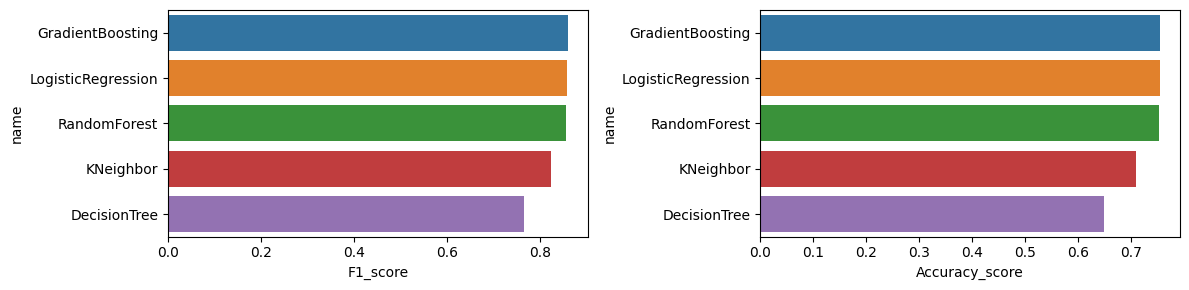

In [63]:
fig, ax = plt.subplots(1,2, figsize = (12,3))
sns.barplot(f1_df, x = 'F1_score', y = 'name', hue = 'name', ax = ax[0])
sns.barplot(accuracy_df, x = 'Accuracy_score', y = 'name', hue = 'name', ax = ax[1])
plt.tight_layout()
plt.show()

## 4.2. Feature Importance

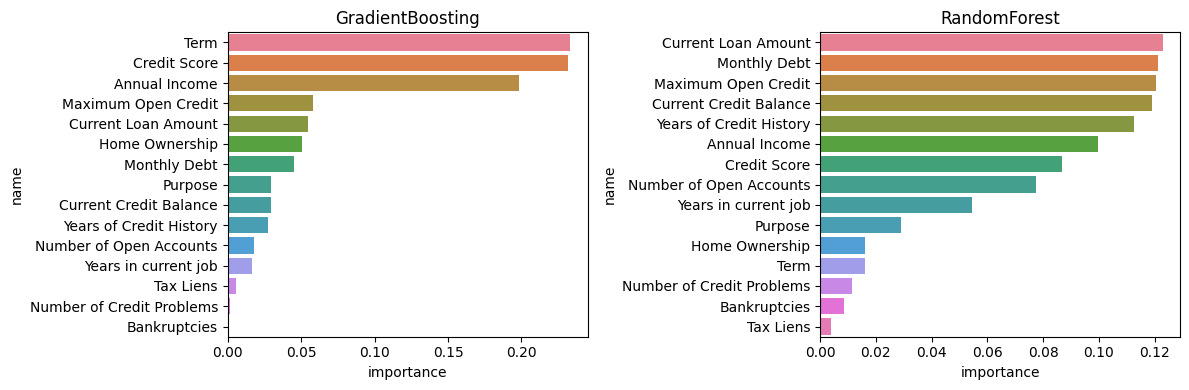

In [64]:
class_ = {
    'GradientBoosting' : GradientBoostingClassifier(random_state = 42),
    'RandomForest' : RandomForestClassifier(random_state = 42)
}
fig, ax = plt.subplots(1,2, figsize = (12,4))
for pos, i in enumerate(class_):
    model = class_[i]
    model.fit(x_train_scaled, y_train)
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({'name': x.columns, 'importance': importance}).sort_values('importance', ascending = False)
    sns.barplot(feature_importance, x = 'importance', y = 'name', ax = ax[pos], hue = 'name')
    ax[pos].set_title(i)
plt.tight_layout()
plt.show()
    

<Axes: xlabel='importance', ylabel='name'>

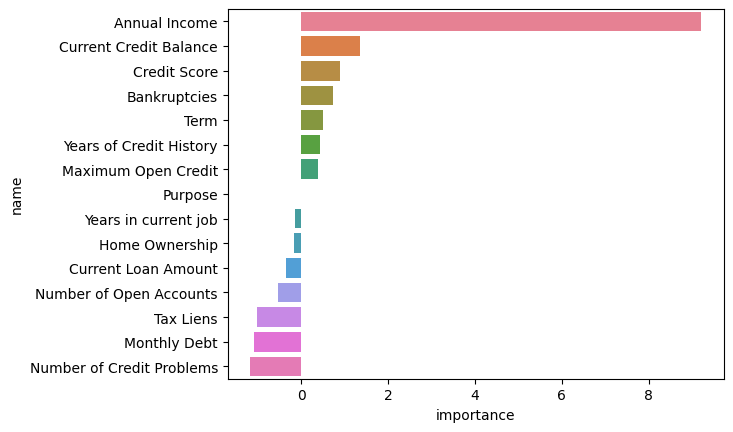

In [65]:
model = LogisticRegression(random_state = 42)
model.fit(x_train_scaled, y_train)
importance = model.coef_[0]
feature_importance = pd.DataFrame({'name':x.columns, 'importance' : importance}).sort_values('importance', ascending = False)
sns.barplot(feature_importance, x = 'importance', y = 'name', hue = 'name')


#### Comment
Annual Income,
Credit Score,
Current Loan Amount,
Maximum Open Credit,
Term,
Current Credit Balance



## 4.3. Lime

In [66]:
model = GradientBoostingClassifier()
model.fit(x_train_scaled, y_train)

x_train_scaled_np = x_train_scaled.values
x_test_scaled_np = x_test_scaled.values
explainer = lime.lime_tabular.LimeTabularExplainer(x_train_scaled_np, mode="classification", feature_names=x.columns, class_names=model.classes_)
exp = explainer.explain_instance(x_test_scaled.iloc[1], model.predict_proba, num_features=len(x.columns))
exp.show_in_notebook(show_table=True, show_all=False)
exp.as_list()

[('Annual Income > 0.04', 0.09228081096603499),
 ('0.00 < Term <= 1.00', 0.08946911409163145),
 ('Maximum Open Credit <= 0.00', -0.05395652447534423),
 ('Credit Score > 0.90', 0.05301322368956866),
 ('Current Loan Amount <= 0.21', 0.028749081495352952),
 ('Current Credit Balance <= 0.01', 0.02148594494277767),
 ('Purpose > 3.00', -0.018053888534447355),
 ('Number of Open Accounts <= 0.11', 0.01609176616253809),
 ('Years in current job <= 0.24', 0.013384849735672904),
 ('Tax Liens <= 0.00', 0.00997158706205755),
 ('1.00 < Home Ownership <= 2.00', -0.0036699350066251783),
 ('0.15 < Years of Credit History <= 0.20', 0.003662776430386362),
 ('Number of Credit Problems <= 0.00', 0.002437973619496673),
 ('Bankruptcies <= 0.00', 0.001333852298965244),
 ('0.04 < Monthly Debt <= 0.05', -0.00042292045267479876)]

In [67]:
def cal(column, scaler_number):
    # Lấy giá trị min và max của cột từ DataFrame
    min_value = df[column].min()
    max_value = df[column].max()
    
    # Giá trị đã chuẩn hóa
    X_scaled = scaler_number
    
    # Tính giá trị gốc
    X_original = X_scaled * (max_value - min_value) + min_value
    return X_original

# Ví dụ gọi hàm với thông số cụ thể
column = input('')
scaler_number = float(input(''))
x = cal(column, scaler_number)
x

KeyboardInterrupt: Interrupted by user

In [79]:
df.groupby('Purpose').size().reset_index().sort_values('Purpose', ascending = True)

,Purpose,0
0,Business Loan,1156
1,Buy House,476
2,Buy a Car,940
3,Debt Consolidation,58130
4,Educational Expenses,74
5,Home Improvements,4303
6,Medical Bills,795
7,Other,2374
8,Take a Trip,401
9,major_purchase,267


In [70]:
dfm

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8.0,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1174162.0,11.0,1,3,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3.0,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,724.0,1174162.0,5.0,3,3,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,0.5,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,0,429132.0,1,724.0,1174162.0,11.0,1,3,28948.02,16.3,16.0,0.0,485279.0,656414.0,0.0,0.0
99992,1,48796.0,1,724.0,1174162.0,4.0,1,9,8298.63,8.3,9.0,0.0,87875.0,239404.0,0.0,0.0
99994,1,210584.0,1,719.0,783389.0,1.0,1,7,3727.61,17.4,6.0,0.0,456.0,259160.0,0.0,0.0
99997,1,103136.0,1,742.0,1150545.0,6.0,3,3,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
